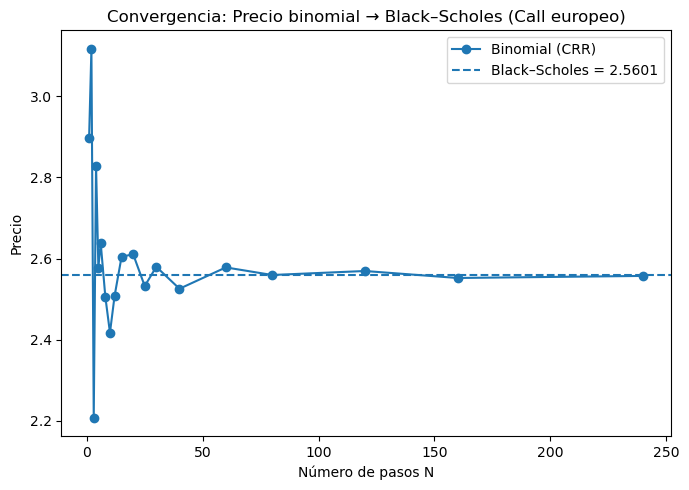

(2.5601165882729155, 2.5571439749917246)

In [ ]:
# Convergence of CRR binomial price to Black–Scholes for a European call
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp, erf

# Parameters (you can edit these)
S0 = 100.0
K  = 110.0
r  = 0.02          # risk-free (cont. comp.)
q  = 0.01          # dividend yield / convenience yield (cont.)
sigma = 0.30
T  = 0.25           # tiempo hasta el vencimiento (en años)

def N(x):
    return 0.5*(1.0 + erf(x/np.sqrt(2.0)))

def bs_call(S0, K, r, q, sigma, T):
    if T <= 0:
        return max(S0 - K, 0.0)
    vol = sigma*np.sqrt(T)
    d1 = (np.log(S0/K) + (r - q + 0.5*sigma*sigma)*T) / vol
    d2 = d1 - vol
    return S0*np.exp(-q*T)*N(d1) - K*np.exp(-r*T)*N(d2)

def crr_binomial_call(S0, K, r, q, sigma, T, Nsteps):
    dt = T / Nsteps
    R  = np.exp(r*dt)
    u  = np.exp(sigma*np.sqrt(dt))
    d  = 1.0/u
    p  = (np.exp((r - q)*dt) - d) / (u - d)
    # terminal prices and payoffs
    j = np.arange(Nsteps+1)
    ST = S0 * (u**j) * (d**(Nsteps - j))
    payoff = np.maximum(ST - K, 0.0)
    # backward induction as vectorized discounting of binomial coefficients
    for _ in range(Nsteps):
        payoff = (p*payoff[1:] + (1-p)*payoff[:-1]) / R
    return payoff[0]

# Compute prices for increasing N
Ns = np.array([1,2,3,4,5,6,8,10,12,15,20,25,30,40,60,80,120,160,240])
binom_prices = np.array([crr_binomial_call(S0,K,r,q,sigma,T,int(n)) for n in Ns])
bs_price = bs_call(S0,K,r,q,sigma,T)

plt.figure(figsize=(7,5))
plt.plot(Ns, binom_prices, marker='o', label="Binomial (CRR)")
plt.axhline(bs_price, linestyle='--', label=f"Black–Scholes = {bs_price:.4f}")
plt.title("Convergencia: Precio binomial → Black–Scholes (Call europeo)")
plt.xlabel("Número de pasos N")
plt.ylabel("Precio")
plt.legend()
plt.tight_layout()
plt.show()

float(bs_price), float(binom_prices[-1])
